# Word cloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nrclex import NRCLex
import nltk
import spacy
nltk.download('punkt')


nlp = spacy.load('en_core_web_md')


/opt/homebrew/anaconda3/envs/py3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariabarbosa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
## Importar o ficheiro csv
df = pd.read_csv('File.csv', index_col=False,sep=',')
print(df.head())

           #AUTHID                                               TEXT cEXT  \
0  2000_576170.txt  I just got back from your class, so I decided ...    n   
1  2000_576862.txt  It is 9:35 and I am beginning my stream of con...    y   
2  1998_733941.txt  Not only was the server down but it has taken ...    y   
3  2000_904579.txt  I am not exactly sure how this is supposed to ...    y   
4  2002_097387.txt  Well, here I am on Friday, September something...    n   

  cNEU cAGR cCON cOPN  split  
0    n    y    y    n      2  
1    n    y    n    y      3  
2    n    y    y    y      3  
3    n    y    n    n      0  
4    n    y    n    n      9  


In [4]:
# update classifiers to integer value
df['cNEU'] = df['cNEU'].map({'n': 0, 'y': 1})
df['cAGR'] = df['cAGR'].map({'n': 0, 'y': 1})
df['cCON'] = df['cCON'].map({'n': 0, 'y': 1})
df['cOPN'] = df['cOPN'].map({'n': 0, 'y': 1})
df['cEXT'] = df['cEXT'].map({'n': 0, 'y': 1})

## Análise dataset

In [71]:
print("O DataSet possui " + str(len(df)) + " entradas!")

O DataSet possui 2467 entradas!


In [72]:
## Verficar se quando um post é Openness, quantas vezes é Agreeableness ou Extroversion;
c = 0
for row in df.itertuples():
    if (row.cOPN == 1 and row.cEXT == 1 and row.cAGR == 1):
        c = c +1   
   
print(c)

# c = 423, ou seja em 423 textos de 2467 estão classificados com os 3 valores. Isto n parece ser um problema.


423


In [73]:
missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing],keys=['Missing values'],axis=1)
missing_info.style.background_gradient()

,Missing values
#AUTHID,0.000000
TEXT,0.000000
cEXT,0.000000
cNEU,0.000000
cAGR,0.000000
cCON,0.000000
cOPN,0.000000
split,0.000000


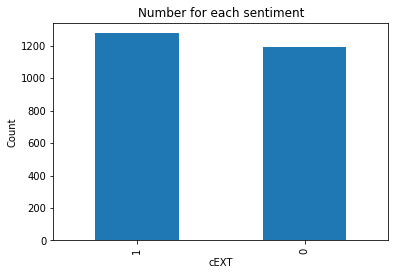

In [15]:
series = df['cEXT'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cEXT')
ax.set_ylabel('Count')
plt.show()

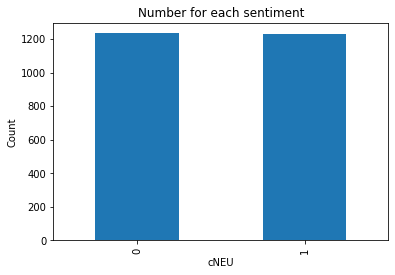

In [17]:
series = df['cNEU'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cNEU')
ax.set_ylabel('Count')
plt.show()

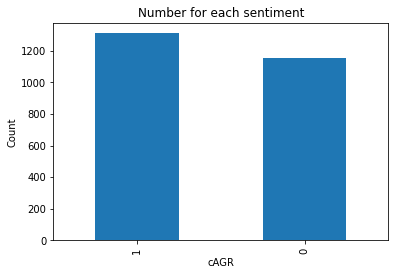

In [18]:
series = df['cAGR'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cAGR')
ax.set_ylabel('Count')
plt.show()

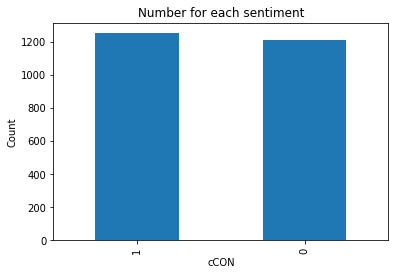

In [20]:
series = df['cCON'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cCON')
ax.set_ylabel('Count')
plt.show()

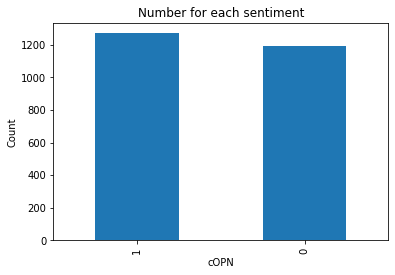

In [22]:
series = df['cOPN'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cOPN')
ax.set_ylabel('Count')
plt.show()

Os 5 gráficos anteriores mostram que o dataset esta balanceado. Encontrando-se uma amostra representativa de todas os cinco traços de personalidade.

## Tratamento do dataset

In [5]:
# Função que faz lematização, retira pontuação e stop words, coloca o texto em minusculas
def dataPrep(text):
    doc = nlp(text)  
    res = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and (token.pos_ == "VERB" or token.pos_ == "ADJ" or token.pos_ == "NOUN")])   
    return res

In [79]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)


In [6]:
for i in range(len(df)):
    df['TEXT'][i] = dataPrep(df['TEXT'][i])

/var/folders/7v/nzkm4hw14qv5j4fghjbfccgr0000gn/T/ipykernel_926/1597617727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TEXT'][i] = dataPrep(df['TEXT'][i])


In [7]:
df.to_csv('essay_verbs_adj_noun.csv', index=False) 

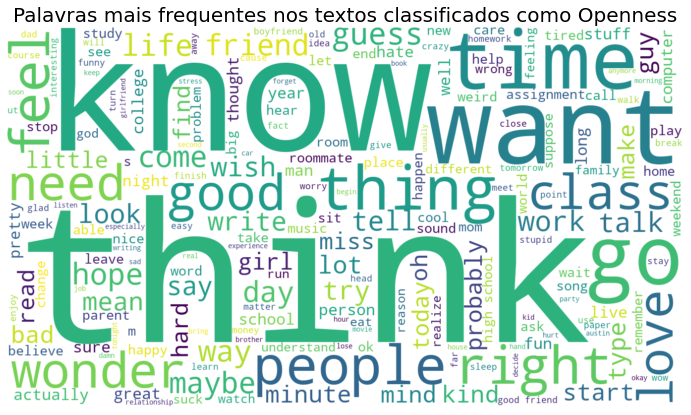

In [37]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, stopwords= STOPWORDS, background_color="white").generate(" ".join(df[df.cOPN==1].TEXT))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes nos textos classificados como Openness',fontsize=20)
plt.show()





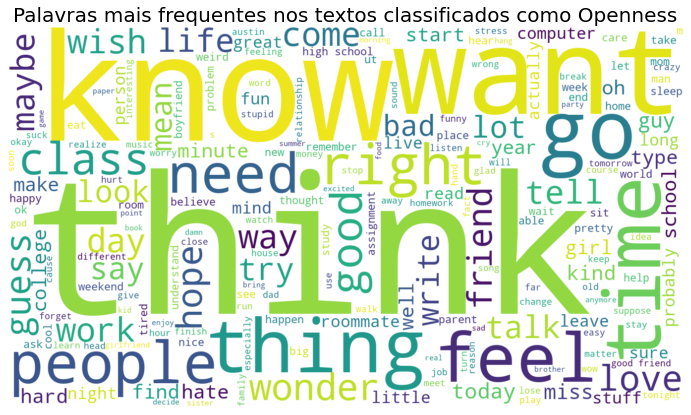

In [38]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, stopwords= STOPWORDS, background_color="white").generate(" ".join(df[df.cNEU==1].TEXT))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes nos textos classificados como Neuroticism',fontsize=20)
plt.show()

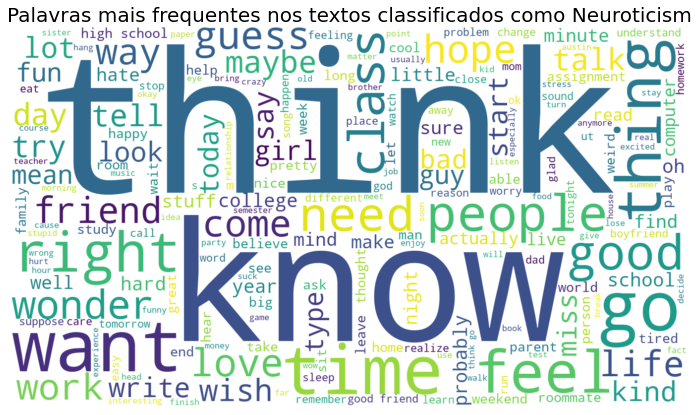

In [39]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, stopwords= STOPWORDS, background_color="white").generate(" ".join(df[df.cAGR==1].TEXT))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes nos textos classificados como Agreeableness',fontsize=20)
plt.show()

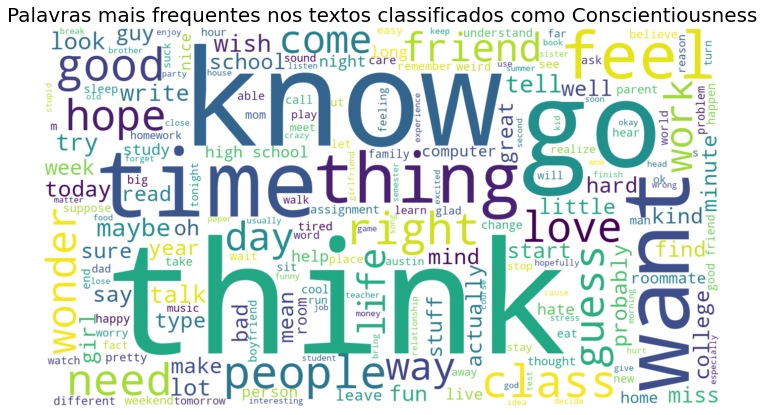

In [41]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, stopwords= STOPWORDS, background_color="white").generate(" ".join(df[df.cCON==1].TEXT))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes nos textos classificados como Conscientiousness',fontsize=20)
plt.show()

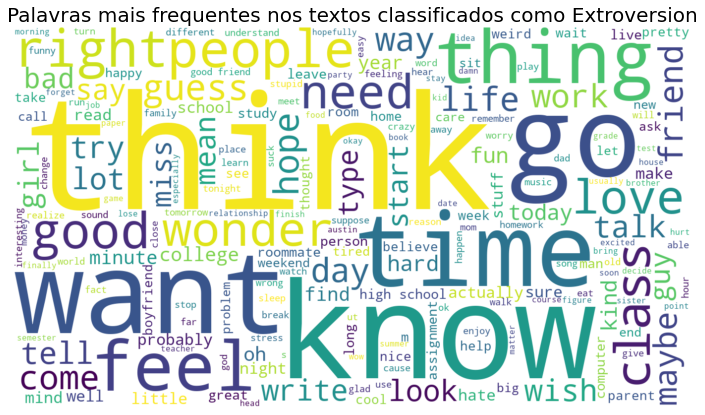

In [42]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, stopwords= STOPWORDS, background_color="white").generate(" ".join(df[df.cEXT==1].TEXT))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes nos textos classificados como Extroversion',fontsize=20)
plt.show()